# 文章數的比較與延伸

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data= pd.read_csv("Presidential candidate.csv")

#### 文章有500讚以上來比較各候選人

In [3]:
c3 = data[((data['Page_Name']=='韓國瑜') | (data['Page_Name']=='宋楚瑜找朋友')|(data['Page_Name']=='蔡英文 Tsai Ing-wen')) & (data['LIKE_COUNT'] > 500)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')

          Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  WOW_COUNT  \
0            宋楚瑜找朋友   151      151     0   151  151         151        151   
2               韓國瑜   552      552     0   552  552         552        552   
1  蔡英文 Tsai Ing-wen   957      957     0   957  957         957        957   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
0         151         151        151          151            151          151   
2         552         552        552          552            552          552   
1         957         957        957          957            957          957   

   Message  Link_Title  Link Description  created_time  
0      139          78                19           151  
2      541         296                52           552  
1      948         440                82           957  
['Page_Name' 'Date' 'Page_ID' 'Link' 'Type' '文章數' 'LIKE_COUNT' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COUNT' 'ANGRY_COUNT' 'Comme

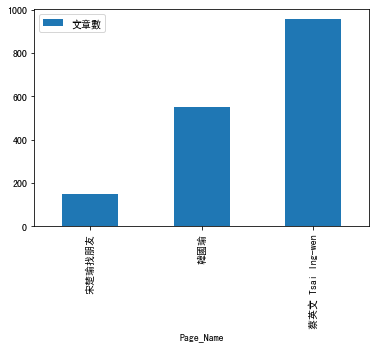

In [4]:
c3=c3.rename(columns={'All_Reaction_Count': '文章數'})
print(c3)
print(c3.columns.values)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
c3.plot.bar(x='Page_Name', y='文章數')

會發現，在500讚以上的文章數，蔡>韓>宋。不過這不表明 各候選人在FB的正面聲量數，也可能是受發文的次數影響。
所以這只能表明在發文次數上，可能會是蔡>韓>宋。但若要進一步找出各候選人在FB的人氣數則可以
『找出各候選人每篇讚數的趨勢圖來比較或將讚與文章的平均數來了解』。由此該議題還可以進一步探討以下：<br>
1.候選人各文章的平均正面聲量<br>
2.候選人各文章的平均留言數<br>
3.候選人各文章的平均負面聲量<br>

####  文章500讚以下來比較各候選人

In [5]:
c4 = data[((data['Page_Name']=='韓國瑜') | (data['Page_Name']=='宋楚瑜找朋友')|(data['Page_Name']=='蔡英文 Tsai Ing-wen')) & (data['LIKE_COUNT'] < 500)].groupby(by ='Page_Name').count().reset_index().sort_values('All_Reaction_Count')

          Page_Name  Date  Page_ID  Link  Type  文章數  LIKE_COUNT  WOW_COUNT  \
2               韓國瑜     2        2     0     2    2           2          2   
1  蔡英文 Tsai Ing-wen     5        5     0     5    5           5          5   
0            宋楚瑜找朋友    17       17     0    17   17          17         17   

   LOVE_COUNT  HAHA_COUNT  SAD_COUNT  ANGRY_COUNT  Comment_Count  Share_Count  \
2           2           2          2            2              2            2   
1           5           5          5            5              5            5   
0          17          17         17           17             17           17   

   Message  Link_Title  Link Description  created_time  
2        1           0                 0             2  
1        5           1                 1             5  
0       12          12                 6            17  
['Page_Name' 'Date' 'Page_ID' 'Link' 'Type' '文章數' 'LIKE_COUNT' 'WOW_COUNT'
 'LOVE_COUNT' 'HAHA_COUNT' 'SAD_COUNT' 'ANGRY_COUNT' 'Comme

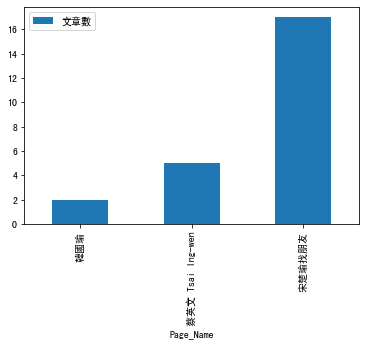

In [6]:
c4=c4.rename(columns={'All_Reaction_Count': '文章數'})
print(c4)
print(c4.columns.values)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
c4.plot.bar(x='Page_Name', y='文章數')

但如果從500讚以下的文章數看，可以看出一些候選人在網路上的高低聲量。因為若網路人氣佳的候選人，即使再發多篇文章，低於500讚的文章也一定不多。
由此，蔡、韓兩人相對於宋來看，其500讚以下的文章數很少。這也大略可以看出，宋在FB人氣不如韓、蔡兩人。

# 候選人發布文章type的比例

([<matplotlib.patches.Wedge at 0x2504649eac8>,
 [Text(1.0906570761204022, 0.14306342058155708, 'link'),
  Text(-0.2957317734951926, 1.059501164768302, 'photo'),
  Text(-0.8470871128885402, -0.7017431319066527, 'status'),
  Text(0.5750145063437919, -0.9377410716686165, 'video')],
 [Text(0.5949038597020374, 0.07803459304448568, '4.2%'),
  Text(-0.16130824008828684, 0.5779097262372554, '50.4%'),
  Text(-0.4620475161210219, -0.38276898103999235, '13.0%'),
  Text(0.31364427618752283, -0.5114951300010635, '32.5%')])

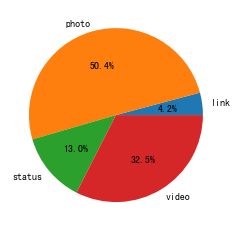

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv("Presidential candidate.csv")
data.head()
likedata1 =  data.groupby(['Page_Name','Type']).count().reset_index()
likedata1 =  likedata1[likedata1['Page_Name'] == '韓國瑜']
likedata1['Page_ID'] = likedata1['Page_ID'].apply(lambda x :x/likedata1['Page_ID'].sum())
plt.pie(likedata1['Page_ID'] , labels = likedata1['Type'],autopct='%1.1f%%') #韓國瑜各PO文的比例

([<matplotlib.patches.Wedge at 0x25046dff748>,
 [Text(1.0823042174405755, 0.19651356418920263, 'link'),
  Text(-0.7076776802201421, 0.8421355597041599, 'photo'),
  Text(-0.430061461056093, -1.0124461169436618, 'status'),
  Text(0.6655929358976141, -0.8757773939096595, 'video')],
 [Text(0.5903477549675865, 0.10718921683047415, '5.7%'),
  Text(-0.3860060073928047, 0.4593466689295417, '60.8%'),
  Text(-0.23457897875786887, -0.5522433365147246, '4.2%'),
  Text(0.36305069230778947, -0.47769676031435965, '29.3%')])

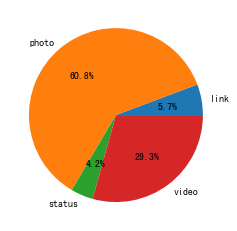

In [8]:
likedata2 =  data.groupby(['Page_Name','Type']).count().reset_index()
likedata2 =  likedata2[likedata2['Page_Name'] == '蔡英文 Tsai Ing-wen']
likedata2['Page_ID'] = likedata2['Page_ID'].apply(lambda x :x/likedata2['Page_ID'].sum())
plt.pie(likedata2['Page_ID'] , labels = likedata2['Type'],autopct='%1.1f%%') #蔡英文各PO文類型的比例

([<matplotlib.patches.Wedge at 0x25046e59788>,
 [Text(1.0905893469510741, 0.14357881569657108, 'link'),
  Text(-0.6858387274057755, 0.8600146742878441, 'photo'),
  Text(-0.4772722460010841, -0.9910656906568207, 'status'),
  Text(0.6025488674806079, -0.9202906401229108, 'video')],
 [Text(0.5948669165187676, 0.07831571765267512, '4.2%'),
  Text(-0.37409385131224115, 0.46909891324791486, '63.1%'),
  Text(-0.2603303160005913, -0.5405812858128112, '1.2%'),
  Text(0.3286630186257861, -0.5019767127943149, '31.5%')])

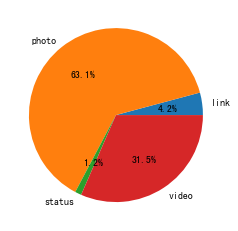

In [9]:
likedata3 =  data.groupby(['Page_Name','Type']).count().reset_index()
likedata3 =  likedata3[likedata3['Page_Name'] == '宋楚瑜找朋友']
likedata3['Page_ID'] = likedata3['Page_ID'].apply(lambda x :x/likedata3['Page_ID'].sum())
plt.pie(likedata3['Page_ID'] , labels = likedata3['Type'],autopct='%1.1f%%') #宋楚瑜各PO文類型的比例

綜合比較來看，各候選人的PO文的類型大多數都使用圖片以及影片的方式。這表明搭配圖像、動態影視在FB上面比純文字、連結更受到青睞。
但這不表明圖像、動態影視在FB上面比純文字、連結所帶來的效果會更好。因此此可在延續探討
1.比較圖像、動態影視、純文字、連結，在FB上面所帶來關注如何?(那些比較受關注)
2.比較圖像、動態影視、純文字、連結，在FB上面對各候選人帶來的效益又是如何?(是否帶來更有利的聲量)

# 觀看三位候選人 每個月的總讚、憤怒、留言、分享數趨勢

In [10]:
df= pd.read_csv("Presidential candidate.csv")
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() 
df["Hour"] = df["Date"].str.split(" ").str.get(1).str.title().str.split(":").str.get(0)
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.strftime('%A')

In [12]:
#觀看蔡英文的趨勢
df_green = df[(df["Page_Name"] == "蔡英文 Tsai Ing-wen" )]
like_green = df_green.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()

C:\Users\veniv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


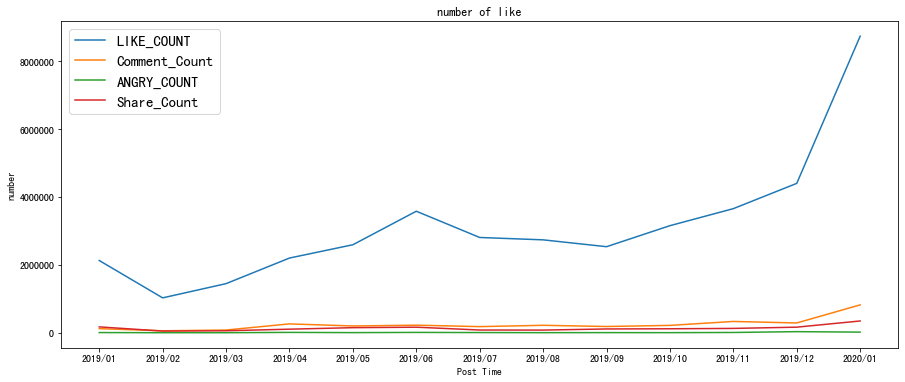

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6)) 
plt.title("number of like")
plt.xlabel("Post Time")    
plt.ylabel("number")         
plt.plot(like_green['Date'],like_green['LIKE_COUNT'],label='LIKE_COUNT')
plt.plot(like_green['Date'],like_green['Comment_Count'],label='Comment_Count')
plt.plot(like_green['Date'],like_green['ANGRY_COUNT'],label='ANGRY_COUNT')
plt.plot(like_green['Date'],like_green['Share_Count'],label='Share_Count')
plt.legend(loc="best",fontsize=15)

趨勢圖可看出，蔡英文每日的文章讚數是增長趨勢。但在某些時間點出現明顯的增加或下降，必須細看當月的發生的事件。<BR>
2月LIKE下降許多，但是ANGRY並未增加。應有受「華航機師罷工」影響。<BR>
6月則是「蔡黨內初選出線」、「反送中事件」、「623反親中媒體大遊行」聲量陡然提升。相對來說「長榮空服罷工」對蔡無太大影響。<BR>
7月「私菸案」<BR>
9月「相繼與吉里巴斯、索羅門群島斷交」<BR>
12月「與網紅合作」、「網紅合體呼籲回家投票」、「總統政見發表會」等<BR>   

C:\Users\veniv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


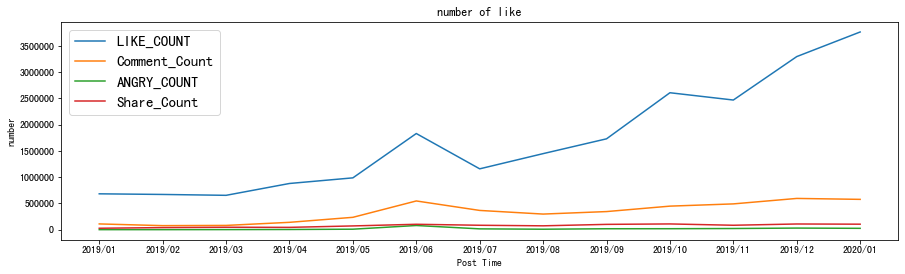

In [20]:
#觀看韓國瑜的趨勢
df_blue = df[(df["Page_Name"] == "韓國瑜" )]
like_blue = df_blue.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_blue
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4)) 
plt.title("number of like")
plt.xlabel("Post Time")   
plt.ylabel("number")           
plt.plot(like_blue['Date'],like_blue['LIKE_COUNT'],label='LIKE_COUNT')
plt.plot(like_blue['Date'],like_blue['Comment_Count'],label='Comment_Count')
plt.plot(like_blue['Date'],like_blue['ANGRY_COUNT'],label='ANGRY_COUNT')
plt.plot(like_blue['Date'],like_blue['Share_Count'],label='Share_Count')
plt.legend(loc="best",fontsize=15)

In [ ]:
##plt.plot(like_blue['Date'],like_blue['LIKE_COUNT']/like_blue['Comment_Count'],label='GG') 平均

趨勢圖可看出，韓國瑜每個日的文章讚數是增長趨勢。但在某些時間點出現明顯的增加或下降，必須細看當月的發生的事件。 <BR>
3月到5月是對「韓是否參選」具有很大的討論<BR>
6月明確表態「參選」<BR>
7月「黨內初選出線」、「高雄淹水問題」、「高雄淹水的關爭議」等等<BR>
9月「造勢活動」搭配個藍營政治人物的宣傳。<BR>
10月「傾聽之旅」<BR>
11月「豪宅」、「砂石案」、「王立強事件」<BR>
12月「政見發表會」<BR>

C:\Users\veniv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


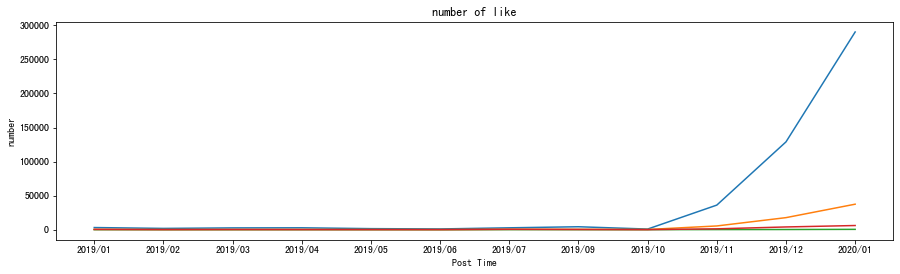

In [22]:
#觀看宋楚瑜的趨勢
df_orange = df[(df["Page_Name"] == "宋楚瑜找朋友" )]
like_orange = df_orange.groupby(df['Date'].dt.strftime('%Y/%m'))['All_Reaction_Count','LIKE_COUNT','WOW_COUNT','HAHA_COUNT','SAD_COUNT','ANGRY_COUNT','Comment_Count','Share_Count'].sum().reset_index()
like_orange
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4)) 
plt.title("number of like") 
plt.xlabel("Post Time")   
plt.ylabel("number")           
plt.plot(like_orange['Date'],like_orange['LIKE_COUNT'])
plt.plot(like_orange['Date'],like_orange['Comment_Count'])
plt.plot(like_orange['Date'],like_orange['ANGRY_COUNT'])
plt.plot(like_orange['Date'],like_orange['Share_Count'])

趨勢圖可看出，宋楚瑜在10-11月左右增長，而正是宋楚瑜宣布參選的時間點<BR>

綜上，雖然上述事件可能影響到讚數，但是可能跟當日發文次數有關，所以要進一步討論可以<BR>
1.從每日文章數與讚數的平均之趨勢來看<BR>
2.從每日文章數與留言數的平均之趨勢來看<BR>
3.從每日文章數與按怒的平均之趨勢來看<BR>
4.細看各明顯增、減時間點的事件是否符合趨勢。

# 候選人 每天發文趨勢

In [24]:
df_post = df.groupby(['Page_Name','Post_Date'])['LIKE_COUNT'].count().reset_index(name='count')
df_blue = df_post[df_post['Page_Name']=='韓國瑜']
df_green  = df_post[df_post['Page_Name']=='蔡英文 Tsai Ing-wen']
df_tw= df_post[df_post['Page_Name']=='宋楚瑜找朋友']

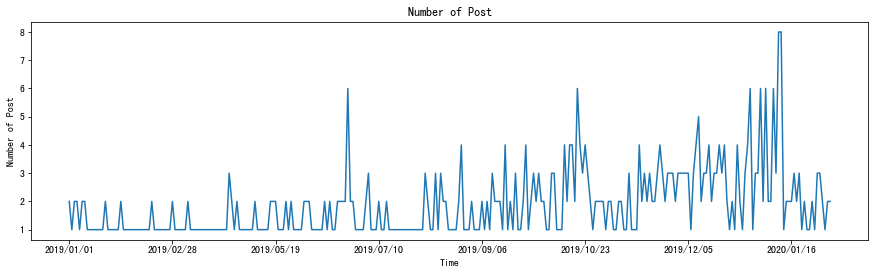

In [25]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,4)) 
plt.title("Number of Post") 
plt.xlabel("Time")         
plt.ylabel("Number of Post")      
plt.plot(df_blue['Post_Date'],df_blue['count']) #韓國瑜每日發文數量趨勢
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) 
plt.show()

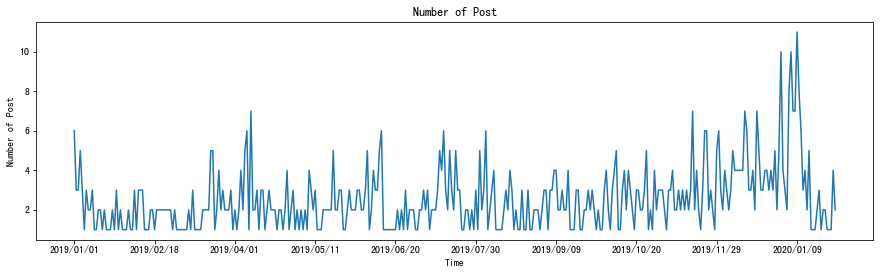

In [26]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,4)) 
plt.title("Number of Post")
plt.xlabel("Time")          
plt.ylabel("Number of Post")          
plt.plot(df_green['Post_Date'],df_green['count']) #蔡英文發每日文數量趨勢
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) 
plt.show()

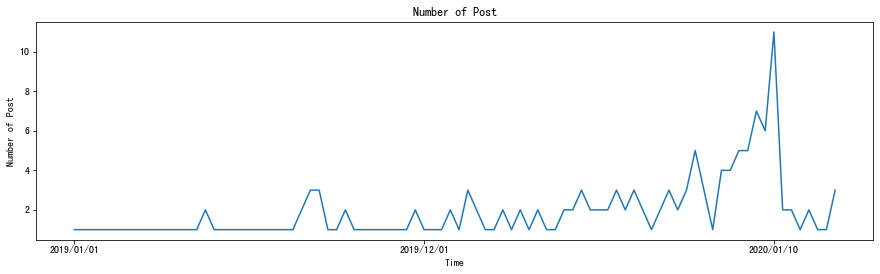

In [27]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15,4)) 
plt.title("Number of Post")
plt.xlabel("Time")         
plt.ylabel("Number of Post")         
plt.plot(df_tw['Post_Date'],df_tw['count']) #宋楚瑜每日發文數量趨勢
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(40)) 
plt.show()

在每日發文密集度來看，蔡>韓>宋，韓在年初、年中的密度並不頻繁，之後才逐漸密集，這可進一步探究原因，
另外，某一些時間點文章數增長，其究竟針對的事件是什麼也是值得探討。

# 各候選人每個月的發文熱圖

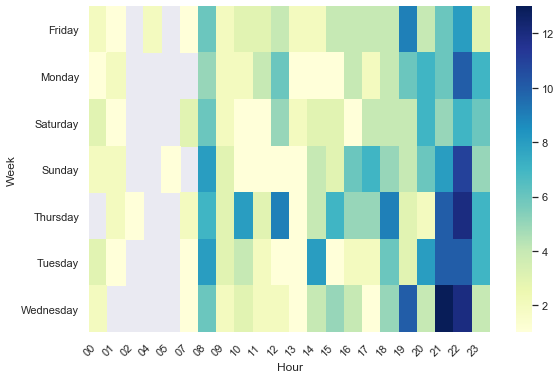

In [29]:
df_blue = df[df['Page_Name']=='韓國瑜']
df_post_blue = df_blue.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
flights = df_post_blue.pivot("Week", "Hour", "count") #韓國瑜發文熱圖
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

In [31]:
#選出蔡英文 Tsai Ing-wen的發文
df_green = df[df['Page_Name']=='蔡英文 Tsai Ing-wen']
df_post_green = df_green.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

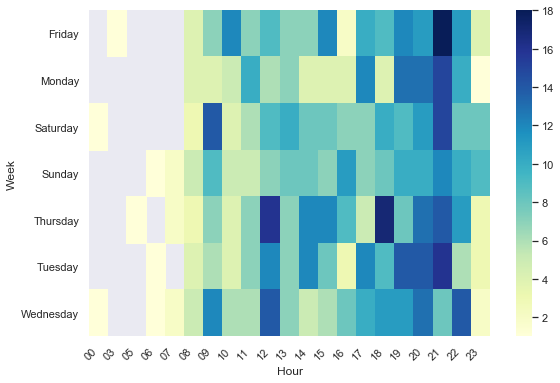

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
flights = df_post_green.pivot("Week", "Hour", "count")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

In [34]:
#選出宋楚瑜找朋友的發文
df_orange = df[df['Page_Name']=='宋楚瑜找朋友']
df_post_orange = df_orange.groupby(['Week','Hour'])['LIKE_COUNT'].count().reset_index(name='count')

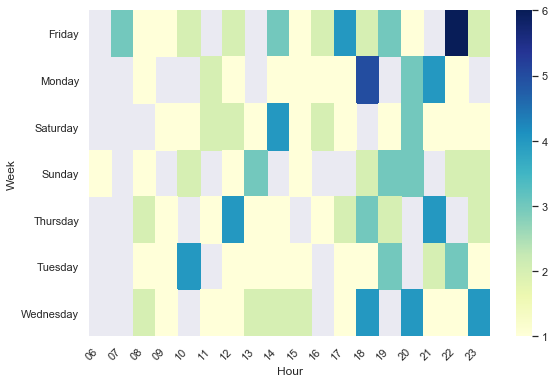

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
flights = df_post_orange.pivot("Week", "Hour", "count")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, fmt="d",cmap='YlGnBu', ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

韓國瑜發文時間是比較集中在20-23點左右。另外韓早上8-9點之間也會發文，是上班族的上班前滑手機、吃早餐時段左右<BR>
蔡英文發文時間相較於韓國瑜是比較平均的。<BR>
宋楚瑜發文則比較零散，集中地方並不多。<BR>
這裡可進一步探討<BR>
1.各時間點，各候選人所發文的類型是什麼?<BR>
2.哪些時間點群眾會回應的量比較高?<BR>
3.不同時間點，不同類型的發文效果如何?<BR>